In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('iryss-data.csv')

In [3]:
#How big is the data?
data.shape

(898, 21)

In [4]:
#How does the data look like
data.head()

AGE     SEX             RACE  HOSPID            DRG         NPR  NCHRONIC  \
0   56   Other            Black       2      ICD-10-CM  1365516690         1   
1   19    Male            Other       9      ICD-10-CM  6951096330         1   
2   76    Male            White       3  ICD-10-CM/PCS  5600059825         1   
3   65    Male         Hispanic       2       ICD-9-CM  6280085793         2   
4   25  Female  Native American       9      ICD-10-CM  6448432997         2   

   ZIPINC_QRTL      PAY1                        PAY2 CM_AIDS CM_ALCOHOL  \
0            3  Medicare                        None      no         no   
1            2  Medicaid              COBRA Coverage      no        yes   
2            2  Medicare                        None      no         no   
3            3  Medicare  Secondary Health Insurance      no         no   
4            3  Medicare  Secondary Health Insurance      no         no   

  CM_ANEMDEF CM_ARTH CM_BLDLOSS CM_CHF  CM_DRUG  DXn  \
0         no      no         no    yes  current    3   
1         no      no         no    yes  current    4   
2         no      no         no     no  current    4   
3         no      no         no    yes  current    4   
4         no      no        yes    yes  current    4   

                                    TRAN_IN  \
0      Transferred from acute care hospital   
1                            Not a transfer   
2  Transferred from another health facility   
3                            Not a transfer   
4                            Not a transfer   

                                TRAN_OUT   TOTCHG  
0                         Not a transfer  43000.0  
1                         Not a transfer  47500.0  
2                         Not a transfer   3000.0  
3  Transferred out to acute are hospital  31000.0  
4                         Not a transfer  46000.0

In [5]:
data.sample(5)

AGE     SEX      RACE  HOSPID            DRG         NPR  NCHRONIC  \
781   40  Female     Black       9       ICD-9-CM  4458197715         1   
301   70   Other  Hispanic       5  ICD-10-CM/PCS  3856393708         1   
551   23   Other     Other       8       ICD-9-CM  4186770110         1   
339   56    Male  Hispanic       5     ICD-10-PCS  2356235351         1   
277   21   Other  Hispanic       5  ICD-10-CM/PCS  7126334272         1   

     ZIPINC_QRTL      PAY1                        PAY2 CM_AIDS CM_ALCOHOL  \
781            2  Medicaid              COBRA Coverage      no        yes   
301            3  Medicare    Employer-Sponsored Plans      no         no   
551            1  Medicaid  Secondary Health Insurance      no         no   
339            1  Medicaid                        None      no        yes   
277            3  Self-Pay  Secondary Health Insurance      no         no   

    CM_ANEMDEF CM_ARTH CM_BLDLOSS CM_CHF  CM_DRUG  DXn  \
781         no      no         no    yes   former    4   
301         no     yes         no    yes    never    3   
551         no      no         no     no  current    3   
339         no      no         no     no  current    3   
277         no      no        yes     no  current    4   

                                  TRAN_IN  \
781  Transferred from acute care hospital   
301  Transferred from acute care hospital   
551                        Not a transfer   
339  Transferred from acute care hospital   
277  Transferred from acute care hospital   

                                       TRAN_OUT   TOTCHG  
781                              Not a transfer  37500.0  
301  Transferred out to another health facility   4000.0  
551  Transferred out to another health facility  26000.0  
339                              Not a transfer  63000.0  
277  Transferred out to another health facility  13000.0

In [6]:
# What is the data type of cols
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          898 non-null    int64  
 1   SEX          898 non-null    object 
 2   RACE         898 non-null    object 
 3   HOSPID       898 non-null    int64  
 4   DRG          898 non-null    object 
 5   NPR          898 non-null    int64  
 6   NCHRONIC     898 non-null    int64  
 7   ZIPINC_QRTL  898 non-null    int64  
 8   PAY1         898 non-null    object 
 9   PAY2         898 non-null    object 
 10  CM_AIDS      898 non-null    object 
 11  CM_ALCOHOL   898 non-null    object 
 12  CM_ANEMDEF   898 non-null    object 
 13  CM_ARTH      898 non-null    object 
 14  CM_BLDLOSS   898 non-null    object 
 15  CM_CHF       898 non-null    object 
 16  CM_DRUG      898 non-null    object 
 17  DXn          898 non-null    int64  
 18  TRAN_IN      898 non-null    object 
 19  TRAN_OUT

In [7]:
#Are there any missing values?
data.isnull().sum()

AGE            0
SEX            0
RACE           0
HOSPID         0
DRG            0
NPR            0
NCHRONIC       0
ZIPINC_QRTL    0
PAY1           0
PAY2           0
CM_AIDS        0
CM_ALCOHOL     0
CM_ANEMDEF     0
CM_ARTH        0
CM_BLDLOSS     0
CM_CHF         0
CM_DRUG        0
DXn            0
TRAN_IN        0
TRAN_OUT       1
TOTCHG         1
dtype: int64

In [8]:
#How does the data look mathematically?
data.describe()

AGE      HOSPID           NPR    NCHRONIC  ZIPINC_QRTL  \
count  898.000000  898.000000  8.980000e+02  898.000000   898.000000   
mean    41.312918    5.028953  5.545503e+09    1.497773     2.028953   
std     21.954576    2.590878  2.558717e+09    0.500274     0.817348   
min      5.000000    1.000000  1.025972e+09    1.000000     1.000000   
25%     22.000000    3.000000  3.355816e+09    1.000000     1.000000   
50%     41.000000    5.000000  5.650862e+09    1.000000     2.000000   
75%     61.000000    7.000000  7.667512e+09    2.000000     3.000000   
max     79.000000    9.000000  9.995461e+09    2.000000     3.000000   

              DXn        TOTCHG  
count  898.000000    897.000000  
mean     3.494432  38673.913043  
std      0.500248  21448.296676  
min      3.000000      0.000000  
25%      3.000000  29000.000000  
50%      3.000000  41000.000000  
75%      4.000000  55500.000000  
max      4.000000  85500.000000

In [9]:
#Are there duplicate values?
data.duplicated().sum()

0

In [10]:
#How is the correlation between cols?
data.corr()

AGE    HOSPID       NPR  NCHRONIC  ZIPINC_QRTL       DXn  \
AGE          1.000000 -0.025775  0.049158  0.044369     0.038634 -0.021716   
HOSPID      -0.025775  1.000000 -0.075112 -0.036075     0.005921  0.013027   
NPR          0.049158 -0.075112  1.000000 -0.027860    -0.052224  0.080652   
NCHRONIC     0.044369 -0.036075 -0.027860  1.000000     0.030149  0.008860   
ZIPINC_QRTL  0.038634  0.005921 -0.052224  0.030149     1.000000 -0.032324   
DXn         -0.021716  0.013027  0.080652  0.008860    -0.032324  1.000000   
TOTCHG      -0.070028  0.013860  0.055841 -0.005850     0.048452 -0.004027   

               TOTCHG  
AGE         -0.070028  
HOSPID       0.013860  
NPR          0.055841  
NCHRONIC    -0.005850  
ZIPINC_QRTL  0.048452  
DXn         -0.004027  
TOTCHG       1.000000

In [11]:
data.corr()['TOTCHG']

AGE           -0.070028
HOSPID         0.013860
NPR            0.055841
NCHRONIC      -0.005850
ZIPINC_QRTL    0.048452
DXn           -0.004027
TOTCHG         1.000000
Name: TOTCHG, dtype: float64

# Univariant Analysis

In [12]:
data['ZIPINC_QRTL'].unique()

array([3, 2, 1])

In [12]:
data['HOSPID'].unique()

array([2, 9, 3, 7, 6, 1, 5, 4, 8])

In [14]:
data['SEX'].unique()

array(['Other', 'Male', 'Female'], dtype=object)

<AxesSubplot:xlabel='SEX', ylabel='count'>

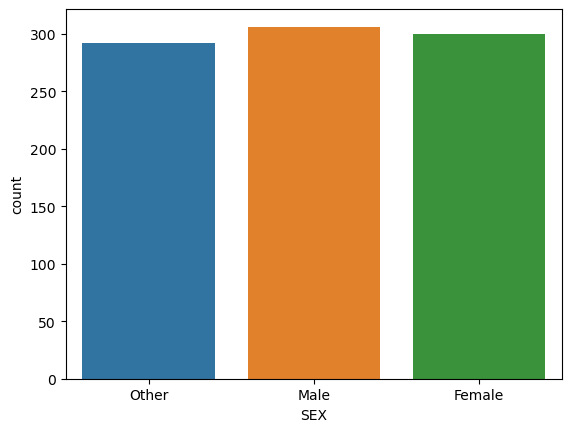

In [15]:
sns.countplot(x=data['SEX'])

In [16]:
data['AGE'].unique()

array([56, 19, 76, 65, 25, 79, 28,  7, 26, 57,  6, 34, 42, 68, 64, 37, 62,
       53, 63, 46, 66, 51, 55, 59, 11, 77, 43, 22,  8, 18, 13, 75, 48, 12,
       39, 40, 54, 10, 58, 67, 38, 78, 52, 44, 30, 45, 33, 49, 69,  5, 15,
        9, 32, 16, 27, 41, 31, 47, 17, 36, 70, 61, 74, 60, 23, 72, 21, 73,
       20, 24, 71, 35, 29, 50, 14])

Text(0, 0.5, 'Number of Person')

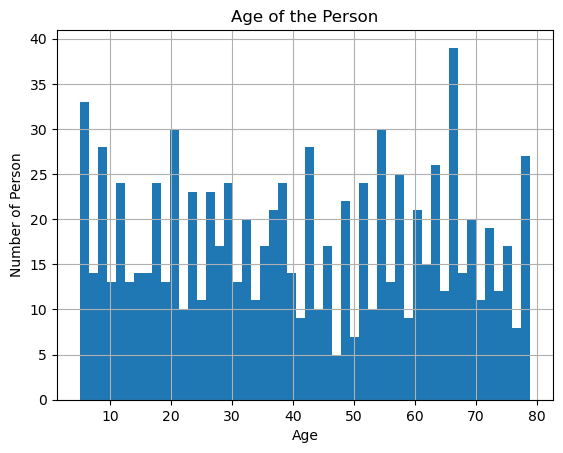

In [17]:
fig = data['AGE'].hist(bins=50)
fig.set_title("Age of the Person")
fig.set_xlabel("Age")
fig.set_ylabel('Number of Person')

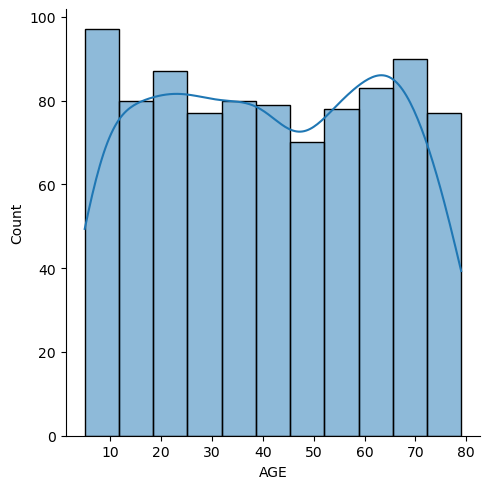

In [18]:
sns.displot(data=data, x="AGE",kde=True)

<AxesSubplot:xlabel='AGE'>

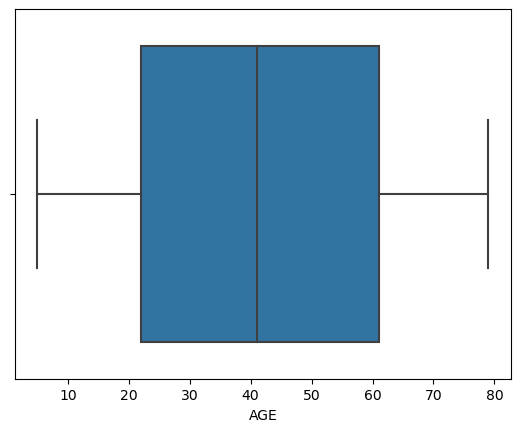

In [19]:
sns.boxplot(x=data['AGE'])

In [20]:
data['AGE'].skew()

0.005822684218973218

In [21]:
data['RACE'].unique()

array(['Black', 'Other', 'White', 'Hispanic', 'Native American',
       'Asian or Pacific Islander'], dtype=object)

Text(0, 0.5, 'Number of Person')

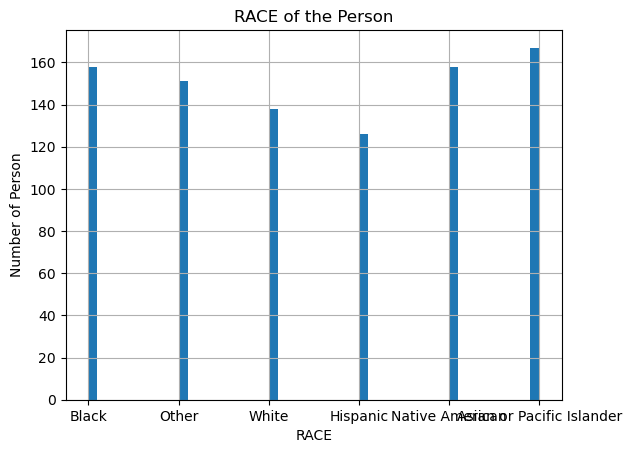

In [22]:
fig = data['RACE'].hist(bins=50)
fig.set_title("RACE of the Person")
fig.set_xlabel("RACE")
fig.set_ylabel('Number of Person')

<AxesSubplot:xlabel='RACE', ylabel='count'>

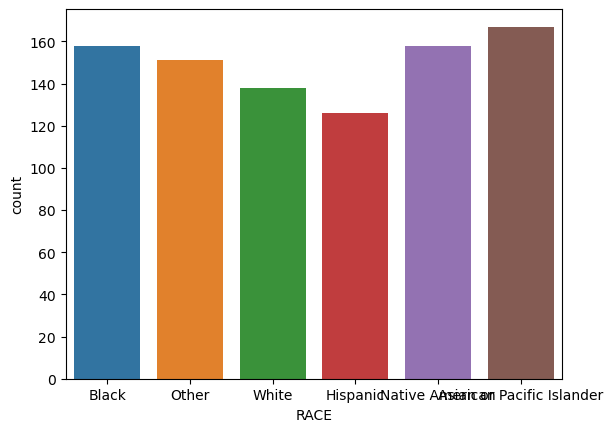

In [23]:
sns.countplot(x=data['RACE'])

In [24]:
data['DRG'].unique()

array(['ICD-10-CM', 'ICD-10-CM/PCS', 'ICD-9-CM', 'ICD-10-PCS'],
      dtype=object)

Text(0, 0.5, 'Number of Person taking the DRUG')

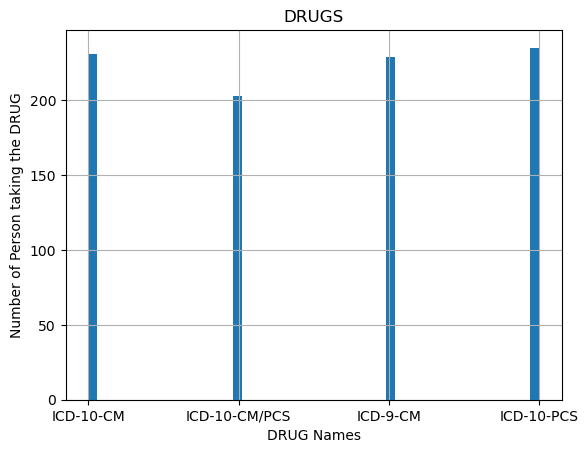

In [25]:
fig = data['DRG'].hist(bins=50)
fig.set_title("DRUGS")
fig.set_xlabel("DRUG Names")
fig.set_ylabel('Number of Person taking the DRUG')

<AxesSubplot:xlabel='DRG', ylabel='count'>

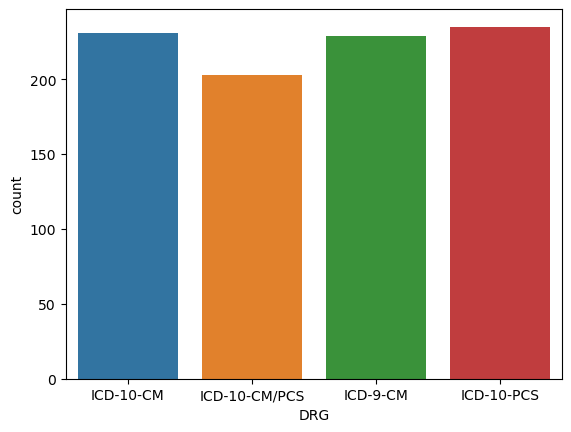

In [26]:
sns.countplot(x=data['DRG'])

In [27]:
data['NCHRONIC'].unique()

array([1, 2])

In [28]:
data['ZIPINC_QRTL'].unique()

array([3, 2, 1])

In [29]:
data['PAY1'].unique()

array(['Medicare', 'Medicaid', 'Private including HMO', 'Self-Pay',
       'No charge', 'Other'], dtype=object)

<AxesSubplot:xlabel='PAY1', ylabel='count'>

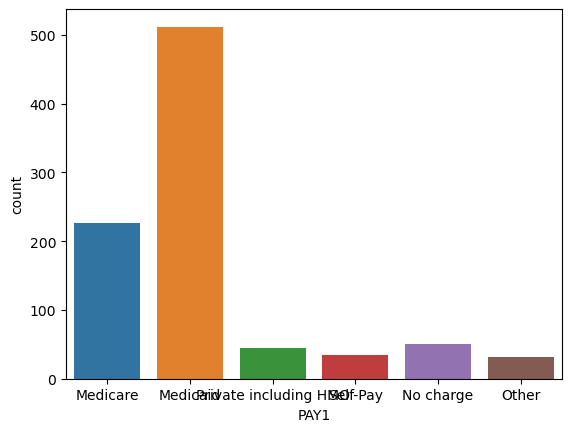

In [30]:
sns.countplot(x=data['PAY1'])

Text(0, 0.5, 'Number of Person in PAY1')

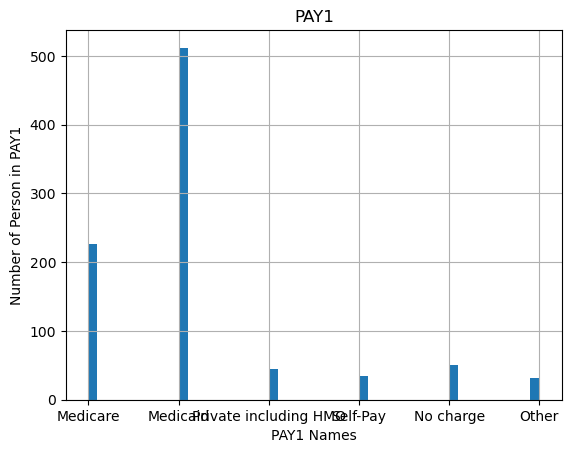

In [31]:
fig = data['PAY1'].hist(bins=50)
fig.set_title("PAY1")
fig.set_xlabel("PAY1 Names")
fig.set_ylabel('Number of Person in PAY1')

In [32]:
data['PAY2'].unique()

array(['None', 'COBRA Coverage', 'Secondary Health Insurance',
       'Employer-Sponsored Plans', 'Government Programs'], dtype=object)

<AxesSubplot:xlabel='PAY2', ylabel='count'>

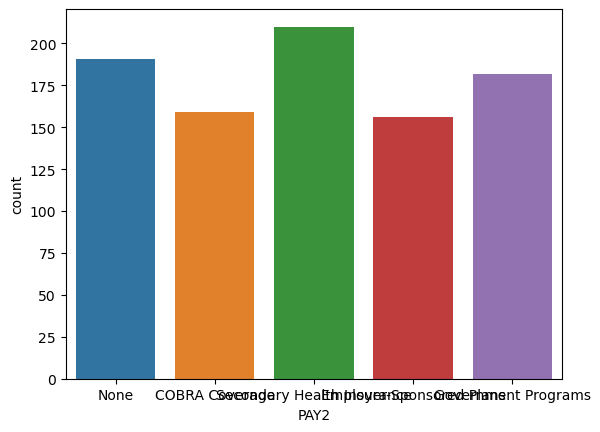

In [33]:
sns.countplot(x=data['PAY2'])

Text(0, 0.5, 'Number of Person in PAY2')

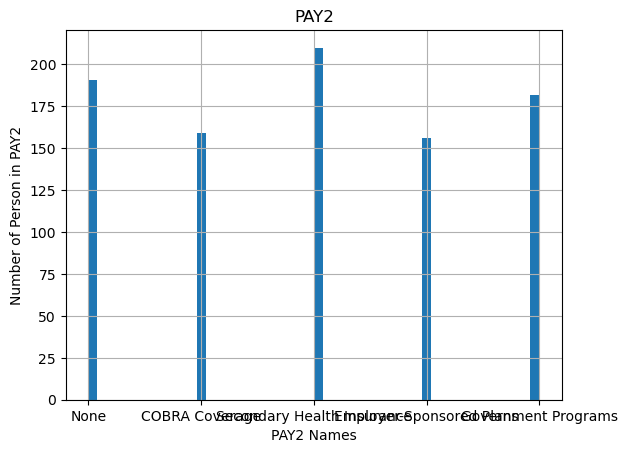

In [34]:
fig = data['PAY2'].hist(bins=50)
fig.set_title("PAY2")
fig.set_xlabel("PAY2 Names")
fig.set_ylabel('Number of Person in PAY2')

In [35]:
data['CM_AIDS'].unique()

array(['no', 'yes'], dtype=object)

<AxesSubplot:xlabel='CM_AIDS', ylabel='count'>

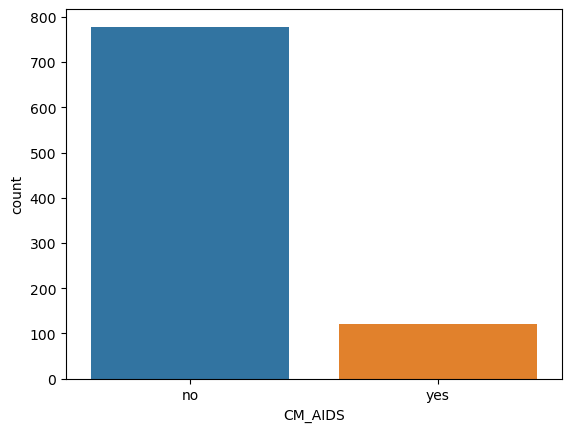

In [36]:
sns.countplot(x=data['CM_AIDS'])

In [37]:
data['CM_ALCOHOL'].unique()

array(['no', 'yes'], dtype=object)

<AxesSubplot:xlabel='CM_ALCOHOL', ylabel='count'>

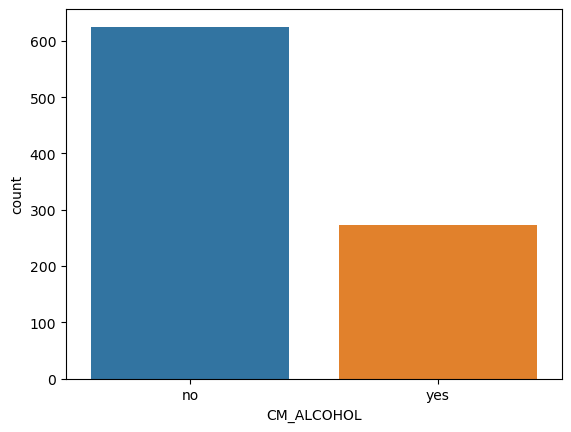

In [38]:
sns.countplot(x=data['CM_ALCOHOL'])

Text(0, 0.5, 'Number of Person in CM_AIDS')

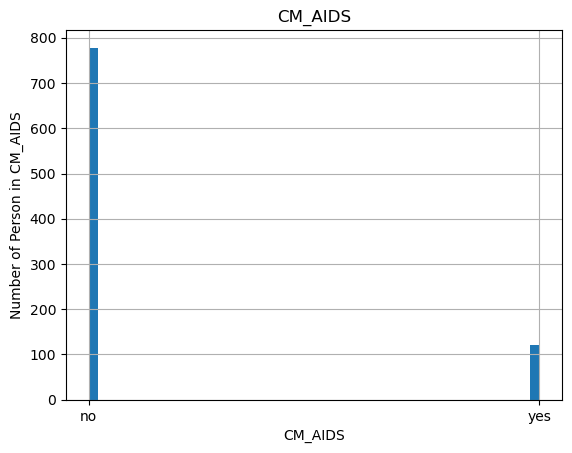

In [39]:
fig = data['CM_AIDS'].hist(bins=50)
fig.set_title("CM_AIDS")
fig.set_xlabel("CM_AIDS")
fig.set_ylabel('Number of Person in CM_AIDS')

Text(0, 0.5, 'Number of Person in CM_ALCOHOL')

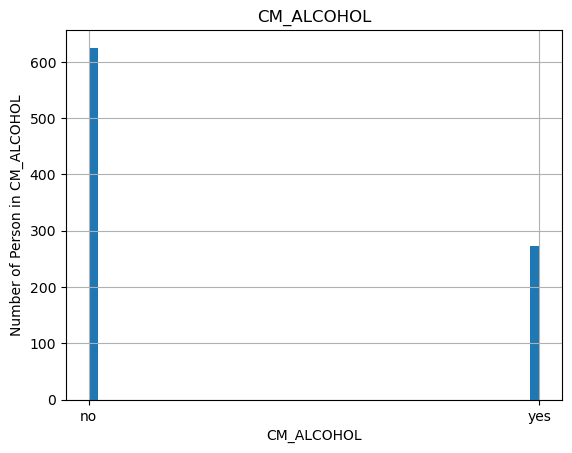

In [40]:
fig = data['CM_ALCOHOL'].hist(bins=50)
fig.set_title("CM_ALCOHOL")
fig.set_xlabel("CM_ALCOHOL")
fig.set_ylabel('Number of Person in CM_ALCOHOL')

In [41]:
data['CM_ANEMDEF'].unique()

array(['no', 'yes'], dtype=object)

<AxesSubplot:xlabel='CM_ANEMDEF', ylabel='count'>

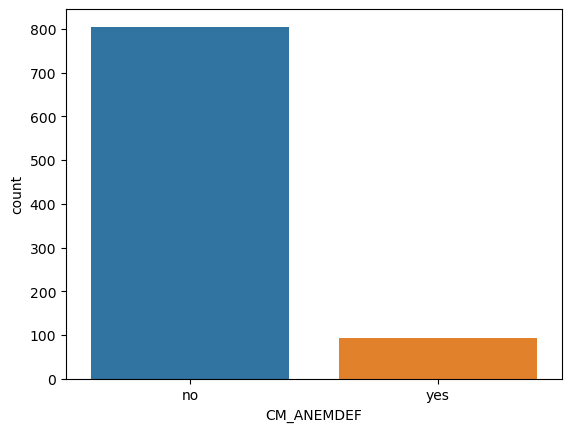

In [42]:
sns.countplot(x=data['CM_ANEMDEF'])

Text(0, 0.5, 'Number of Person in CM_ANEMDEF')

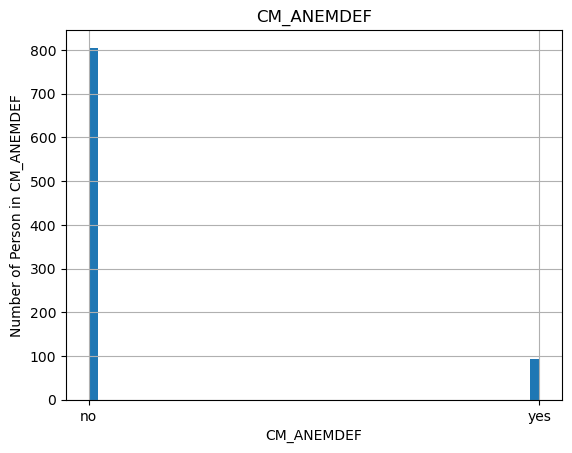

In [43]:
fig = data['CM_ANEMDEF'].hist(bins=50)
fig.set_title("CM_ANEMDEF")
fig.set_xlabel("CM_ANEMDEF")
fig.set_ylabel('Number of Person in CM_ANEMDEF')

In [44]:
data['CM_ARTH'].unique()

array(['no', 'yes'], dtype=object)

<AxesSubplot:xlabel='CM_ARTH', ylabel='count'>

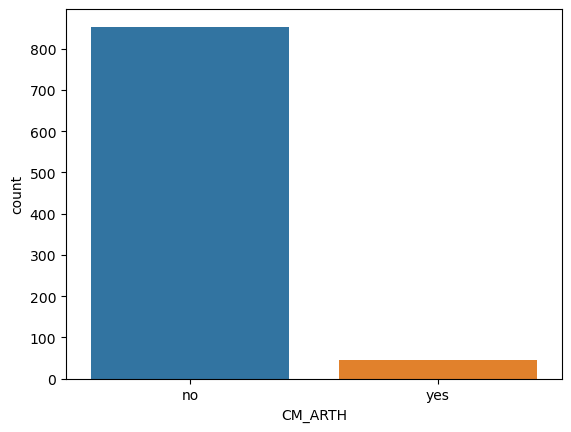

In [45]:
sns.countplot(x=data['CM_ARTH'])

Text(0, 0.5, 'Number of Person in CM_ARTH')

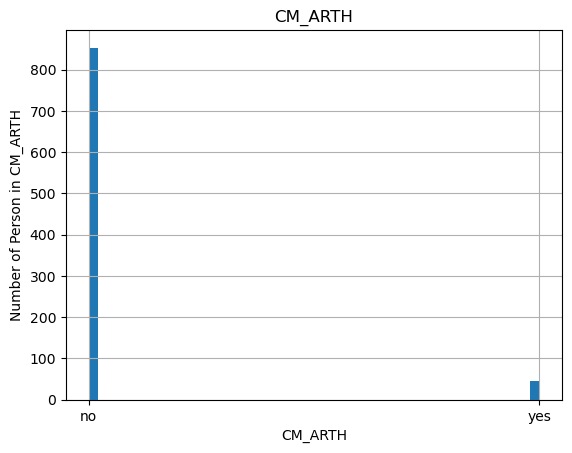

In [46]:
fig = data['CM_ARTH'].hist(bins=50)
fig.set_title("CM_ARTH")
fig.set_xlabel("CM_ARTH")
fig.set_ylabel('Number of Person in CM_ARTH')

In [47]:
data['CM_BLDLOSS'].unique()

array(['no', 'yes'], dtype=object)

<AxesSubplot:xlabel='CM_BLDLOSS', ylabel='count'>

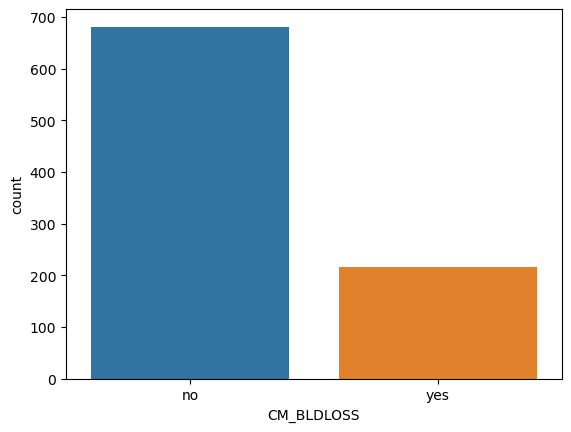

In [48]:
sns.countplot(x=data['CM_BLDLOSS'])

Text(0, 0.5, 'Number of Person in CM_BLDLOSS')

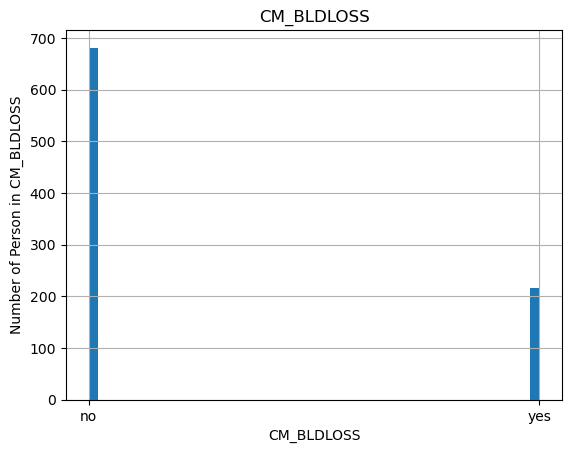

In [49]:
fig = data['CM_BLDLOSS'].hist(bins=50)
fig.set_title("CM_BLDLOSS")
fig.set_xlabel("CM_BLDLOSS")
fig.set_ylabel('Number of Person in CM_BLDLOSS')

In [50]:
data['CM_CHF'].unique()

array(['yes', 'no'], dtype=object)

<AxesSubplot:xlabel='CM_CHF', ylabel='count'>

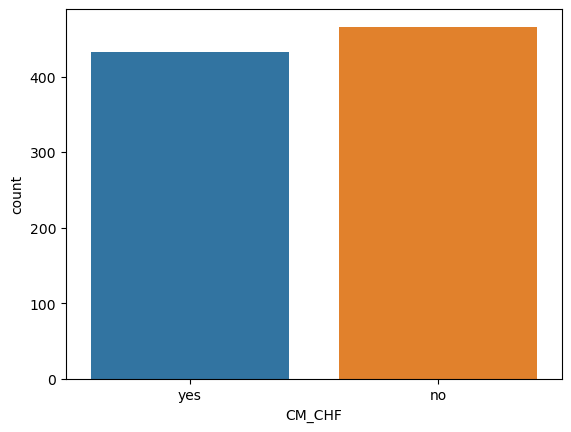

In [51]:
sns.countplot(x=data['CM_CHF'])

Text(0, 0.5, 'Number of Person in CM_CHF')

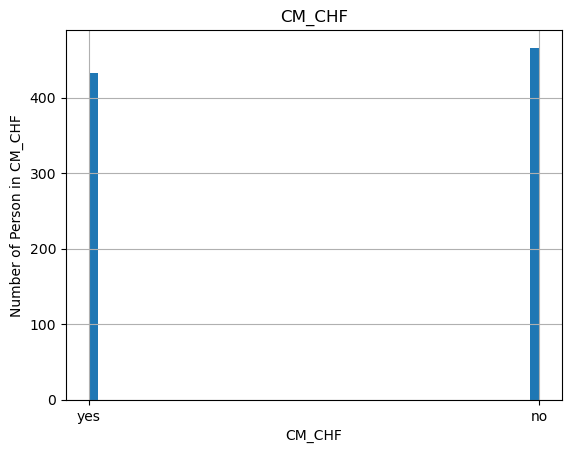

In [52]:
fig = data['CM_CHF'].hist(bins=50)
fig.set_title("CM_CHF")
fig.set_xlabel("CM_CHF")
fig.set_ylabel('Number of Person in CM_CHF')

In [53]:
data['CM_DRUG'].unique()

array(['current', 'never', 'former'], dtype=object)

<AxesSubplot:xlabel='CM_DRUG', ylabel='count'>

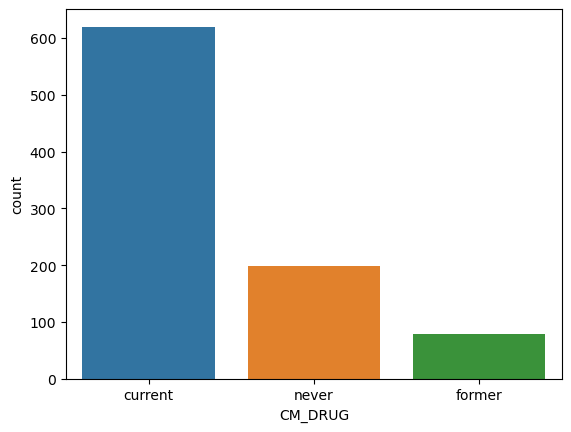

In [54]:
sns.countplot(x=data['CM_DRUG'])

Text(0, 0.5, 'Number of Person in CM_DRUG')

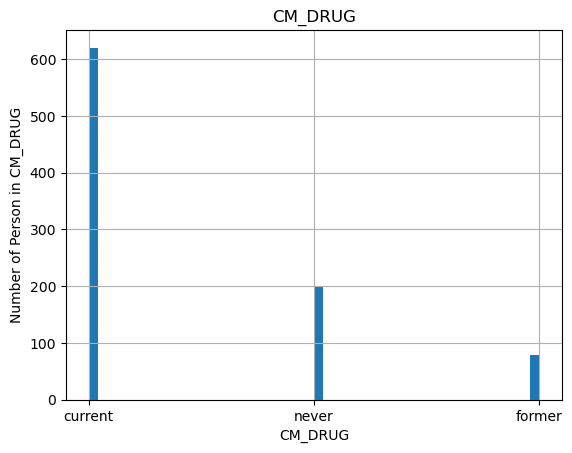

In [55]:
fig = data['CM_DRUG'].hist(bins=50)
fig.set_title("CM_DRUG")
fig.set_xlabel("CM_DRUG")
fig.set_ylabel('Number of Person in CM_DRUG')

In [56]:
data['DXn'].unique()

array([3, 4])

<AxesSubplot:xlabel='DXn', ylabel='count'>

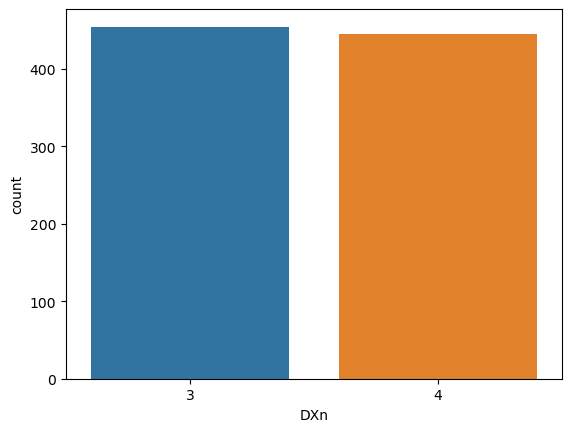

In [57]:
sns.countplot(x=data['DXn'])

Text(0, 0.5, 'Number of Person in DXn')

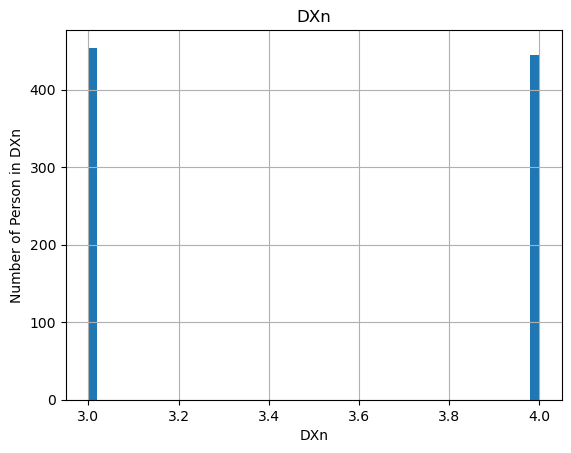

In [58]:
fig = data['DXn'].hist(bins=50)
fig.set_title("DXn")
fig.set_xlabel("DXn")
fig.set_ylabel('Number of Person in DXn')

In [59]:
data['TRAN_IN'].unique()

array(['Transferred from acute care hospital', 'Not a transfer',
       'Transferred from another health facility', 'Transferred from '],
      dtype=object)

<AxesSubplot:xlabel='TRAN_IN', ylabel='count'>

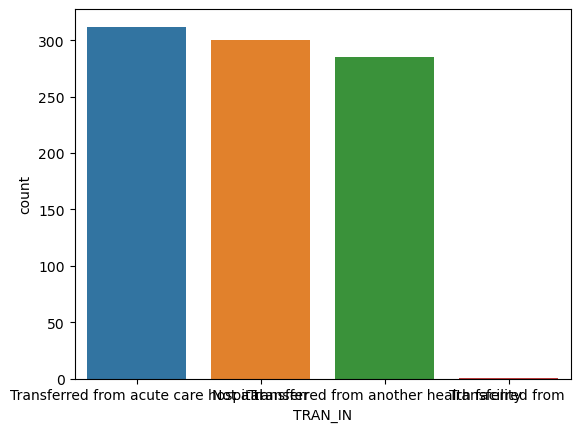

In [60]:
sns.countplot(x=data['TRAN_IN'])

Text(0, 0.5, 'Number of Person in TRAN_IN')

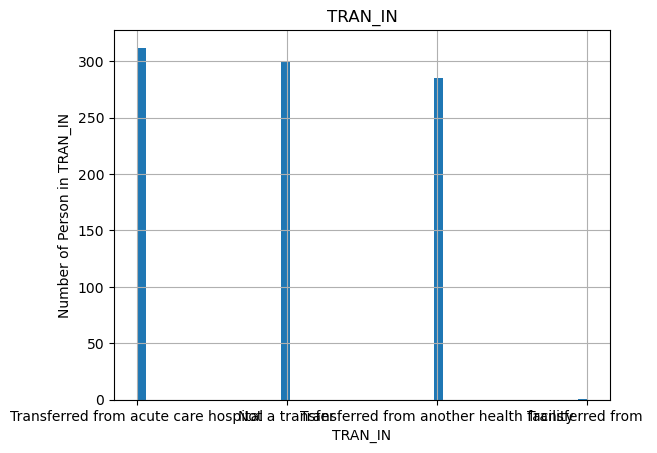

In [61]:
fig = data['TRAN_IN'].hist(bins=50)
fig.set_title("TRAN_IN")
fig.set_xlabel("TRAN_IN")
fig.set_ylabel('Number of Person in TRAN_IN')

In [62]:
data['TRAN_OUT'].unique()

array(['Not a transfer', 'Transferred out to acute are hospital',
       'Transferred out to another health facility', nan], dtype=object)

<AxesSubplot:xlabel='TRAN_OUT', ylabel='count'>

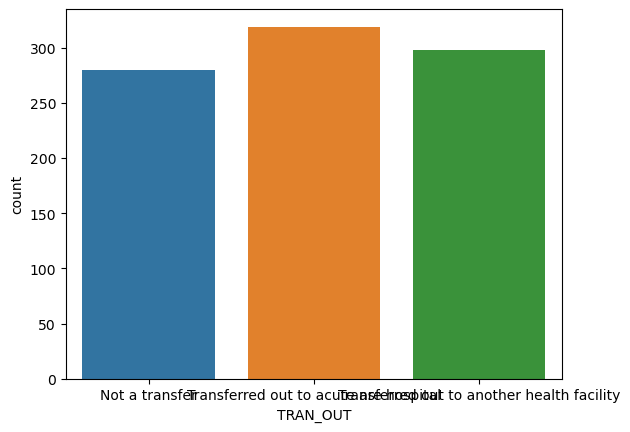

In [63]:
sns.countplot(x=data['TRAN_OUT'])

Text(0, 0.5, 'Number of Person in TRAN_OUT')

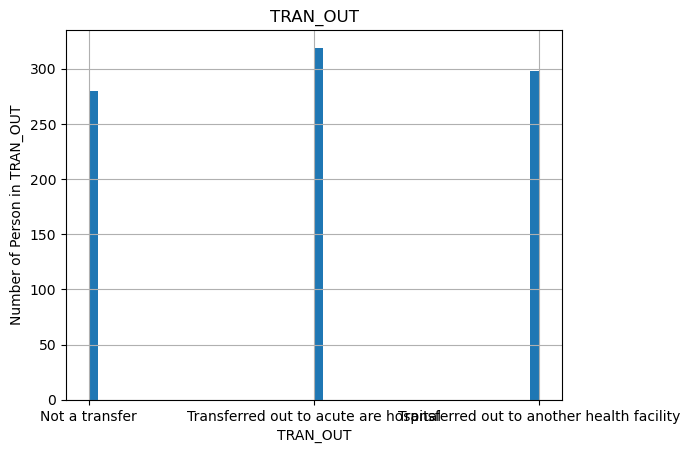

In [64]:
fig = data['TRAN_OUT'].hist(bins=50)
fig.set_title("TRAN_OUT")
fig.set_xlabel("TRAN_OUT")
fig.set_ylabel('Number of Person in TRAN_OUT')

# MultiVariant Analysis

/Users/hadoop/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='DXn'>

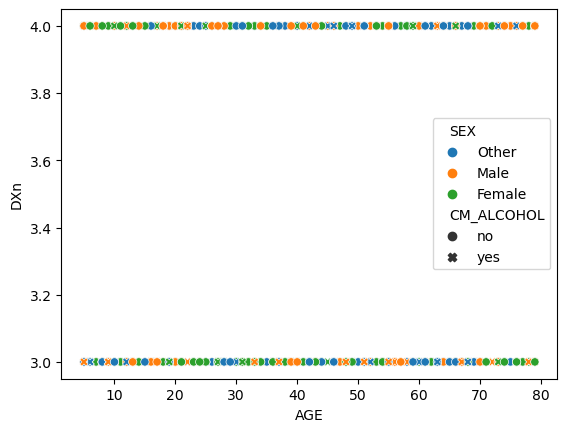

In [65]:
sns.scatterplot(data['AGE'],data['DXn'],hue=data['SEX'],style=data['CM_ALCOHOL'])

<AxesSubplot:xlabel='SEX', ylabel='AGE'>

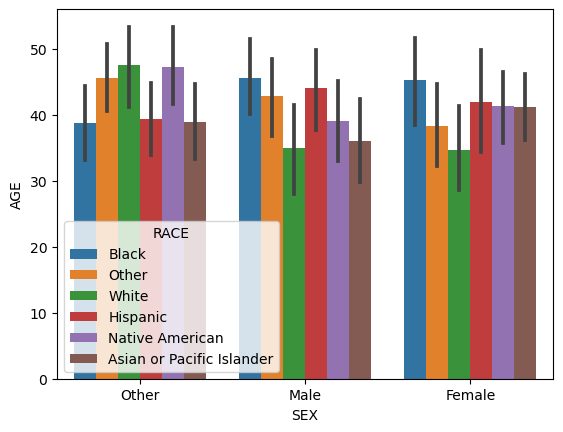

In [66]:
sns.barplot(x=data['SEX'],y=data['AGE'],hue=data['RACE'])

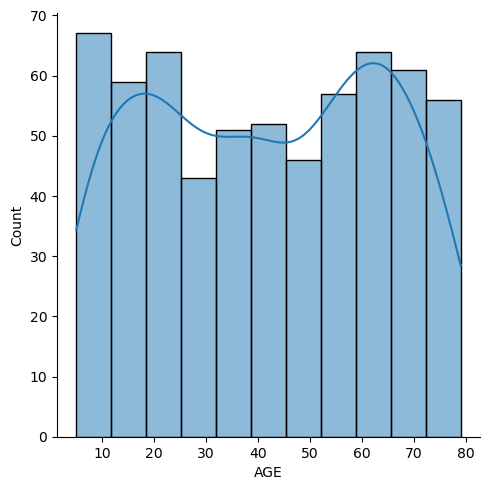

In [67]:
sns.displot(data[data['CM_DRUG'] =='current']['AGE'],kde=True)

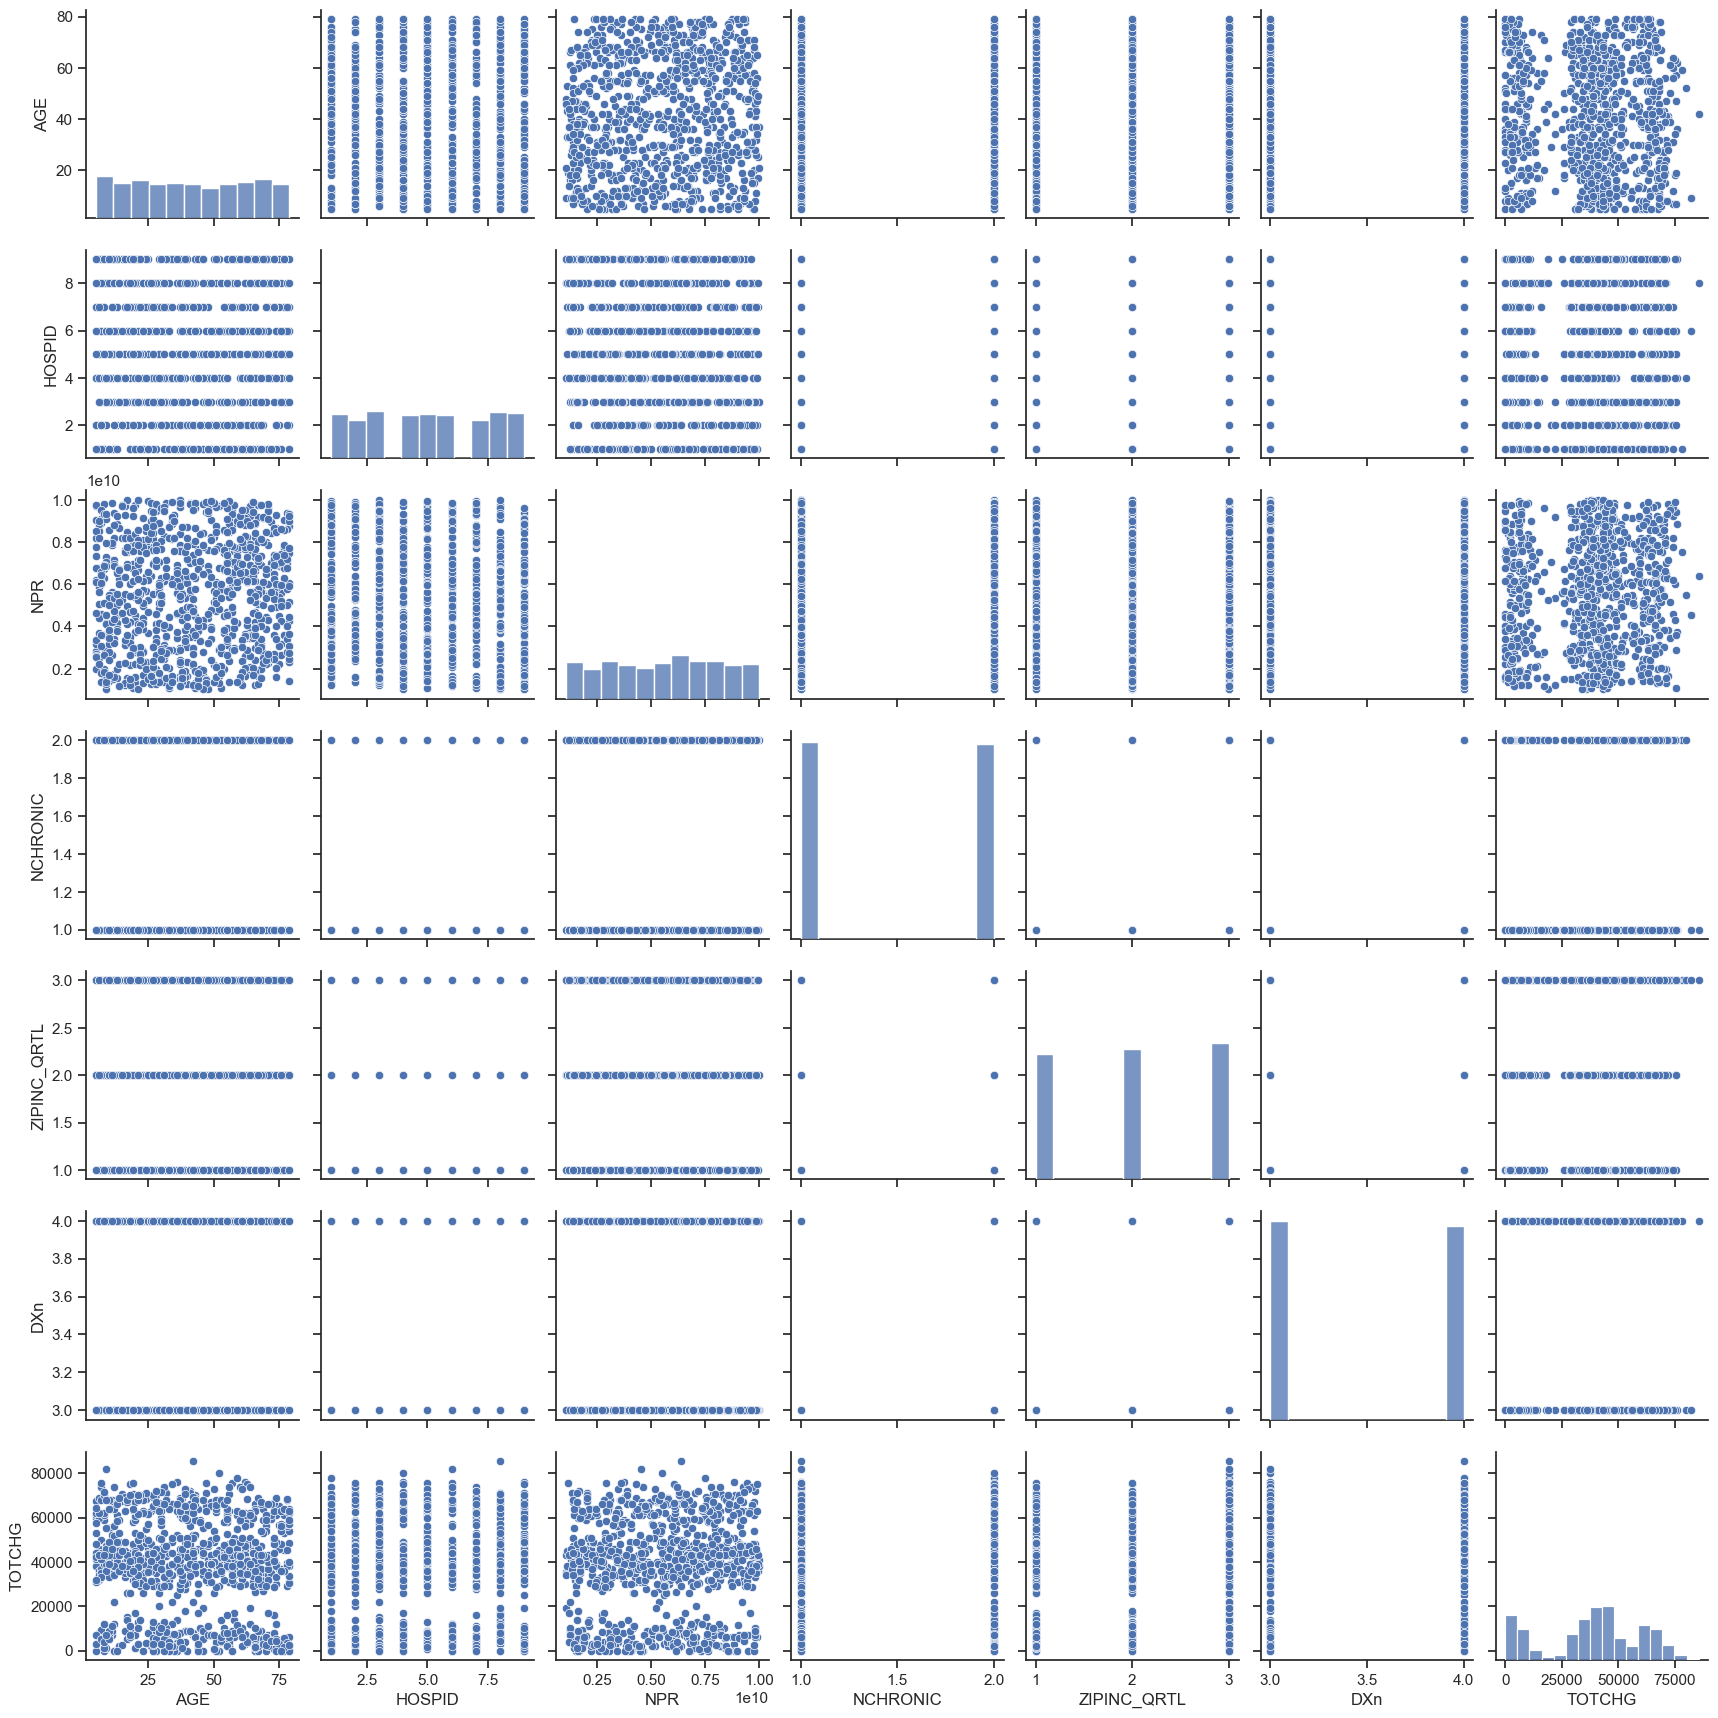

In [68]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

In [69]:
data.groupby('AGE').sum().reset_index()

AGE  HOSPID           NPR  NCHRONIC  ZIPINC_QRTL  DXn    TOTCHG
0     5     104  103249082394        28           34   64  755000.0
1     6      71   91468487753        21           30   54  635500.0
2     7      67   79518786329        21           27   51  597500.0
3     8      73   68716568069        24           30   47  507500.0
4     9      70   82561371637        22           30   50  566000.0
..  ...     ...           ...       ...          ...  ...       ...
70   75      28   29080249022         7           13   22  208500.0
71   76      56   59903102593        18           21   36  454000.0
72   77      51   57227178692        14           16   29  266500.0
73   78      50   59958299960        15           19   35  407000.0
74   79      74   93055336865        31           37   60  591000.0

[75 rows x 7 columns]

In [70]:
!pip install pandas.profiling

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.3.1-py2.py3-none-any.whl (352 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.2 MB/s eta 0:00:00:00:0100:01
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 652.9/652.9 kB 7.9 MB/s eta 0:00:0000:0100:01
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2fefd10d535ab5e369496ea3581a9d58e266b0f1d4e7aa5999dfcc99e3bcf4f5
  S

In [72]:
from ydata_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
corr_matrix = data.corr()
corr_matrix["TOTCHG"].sort_values(ascending=False)

TOTCHG         1.000000
NPR            0.055841
ZIPINC_QRTL    0.048452
HOSPID         0.013860
DXn           -0.004027
NCHRONIC      -0.005850
AGE           -0.070028
Name: TOTCHG, dtype: float64